**<span style="font-size:30px;">Employees Attrition Analysis</span>**

<span style="font-size:24px;">Business Problem Statement:</span>

A Company, established a few years ago, is grappling with a persistent 15% annual employee attrition rate. This high turnover is significantly impacting productivity, team morale, and operational costs. Analysis shows that replacing an employee costs approximately 1.5 to 2 times their annual salary and much more in lost productivity, translating to substantial financial losses for the company. To address this issue, we propose conducting a comprehensive HR analytics study. By analyzing existing employee data, we aim to identify key factors contributing to attrition and develop targeted retention strategies. This data-driven approach will enable the company to make informed decisions, potentially reducing the attrition rate to below 10% within the next fiscal year and saving financial losses for the company.

<span style="font-size:24px;">Understanding the Problem and Creating a Project Statement:</span>

To effectively address the high attrition rate, we need to translate the business problem into a data science problem statement. This will guide us in generating relevant insights and following appropriate analytical steps.

**Attrition Rate:** The attrition rate quantifies employee turnover as a percentage. A healthy organization typically has an attrition rate of 10% or less. High attrition negatively impacts the company’s costs, productivity, and morale.

Given our company’s attrition rate above 15%, it is crucial to identify the underlying reasons to develop targeted retention strategies.

Key questions for analysis include:

* How are the KPIs performing?
* How do employee demographics affect attrition?
* Are salary and financial incentives adequate?
* Do certain departments and job roles have higher attrition rates?
* Is the company’s work culture satisfactory?
* Which factors have the largest impact on attrition?


By answering these questions through data analysis, we aim to reduce the attrition rate to below 10% and mitigate financial losses.

**<span style="font-size:20px;">Importing Required Libraries</span>**

In [3]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [5]:
# Loading the Employee Data into a Pandas DataFrame
df = pd.read_csv('Attrition data.csv')

**<span style="font-size:20px;">Data Exploration</span>**

In [8]:
df.shape

(4410, 29)

In [10]:
df.head(5) # Displays the first 5 rows of the DataFrame 'df'

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [12]:
columns = df.columns # enlist all the columns in the dataframe
columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [14]:
df.info() # Displays a concise summary of the DataFrame 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [16]:
df.describe() # Generates descriptive statistics for the DataFrame 'df'

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


**<span style="font-size:24px;">Data Cleaning:</span>**

In [19]:
# Droping the specified columns from the DataFrame 'df' in place
df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True) 

In [21]:
# Counting the total number of missing values in the DataFrame
nulls=df.isnull().sum()
print(nulls)

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


In [23]:
nulls=df.isnull().sum()
print(nulls)

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


In [25]:
# Imputing missing values with mean values for the coulmn

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(round(df['NumCompaniesWorked'].mean()))
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(round(df['EnvironmentSatisfaction'].mean()))
df['JobSatisfaction'] = df['JobSatisfaction'].fillna(round(df['JobSatisfaction'].mean()))
df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(round(df['WorkLifeBalance'].mean()))

In [27]:
# Counting the total number of duplicated rows in the DataFrame
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [29]:
# Exporting the Cleaned Dataframe for making dashboard in Power BI
df.to_csv('Clean_HR_Data.csv', index=False)

**<span style="font-size:20px;">Initial Observations And Descriptive Statistics </span>**

In [32]:
# Number of unique employees
total_employees = df['EmployeeID'].nunique()
print("Total Number of Employees:", total_employees)

Total Number of Employees: 4410


In [34]:
# Total number of employees with attrition
total_attrition = df['Attrition'].value_counts()['Yes']
print("Attrition:", total_attrition)

Attrition: 711


In [36]:
# Grouping by 'Gender' and counting the number of employees in each group
demographics = df.groupby('Gender').size()
print("Demographics of Employees:", demographics)

Demographics of Employees: Gender
Female    1764
Male      2646
dtype: int64


In [38]:
# Counting the number of employees in each department
departments = df['Department'].value_counts()
print("Number of Employees according to department:", departments)

Number of Employees according to department: Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64


In [40]:
# Counting the number of employees in each job role
job_roles = df['JobRole'].value_counts()
print("Total Number of Employees as per job role:", job_roles)

Total Number of Employees as per job role: JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: count, dtype: int64


In [42]:
# Counting the number of employees in each job level
job_levels = df['JobLevel'].value_counts()
print("Total Number of Employees as per job level:", job_levels)

Total Number of Employees as per job level: JobLevel
1    1629
2    1602
3     654
4     318
5     207
Name: count, dtype: int64


In [44]:
# Counting the number of employees in each education field
education_fields = df['EducationField'].value_counts()
print("Total Number of Employees as per education field:", education_fields)

Total Number of Employees as per education field: EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64


In [46]:
# Counting the number of employees in each marital status category
marital_statuses = df['MaritalStatus'].value_counts()
print("Total Number of Employees as per marital status:", marital_statuses)

Total Number of Employees as per marital status: MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: count, dtype: int64


**<span style="font-size:24px;">Calculating KPIs</span>**

In [49]:
# Total attrition
total_attrition = df['Attrition'].value_counts()['Yes']


# Attrition rate = ( Attrition / Total Employees ) * 100
attrition_rate = (df['Attrition'].value_counts()['Yes'] / df['Attrition'].value_counts().sum()) * 100

print('Attrition =' , total_attrition)
print('Attrition Rate =' , attrition_rate, '%')

Attrition = 711
Attrition Rate = 16.122448979591837 %


In [51]:
# Total retention
total_retention = df['Attrition'].value_counts()['No']


# Retention rate
retention_rate = (df['Attrition'].value_counts()['No'] / df['Attrition'].value_counts().sum()) * 100

print('Retention =' , total_retention)
print('Retention Rate =' , retention_rate, '%')

Retention = 3699
Retention Rate = 83.87755102040816 %


In [53]:
# Count of employees leaving each department
count_leaving_per_dept = df[df['Attrition'] == 'Yes']['Department'].value_counts()
count_remaining_per_dept = df[df['Attrition'] == 'No']['Department'].value_counts()

result = pd.DataFrame({
    'Attrition per department': count_leaving_per_dept,
    'Retention per department': count_remaining_per_dept
})

result

,Attrition per department,Retention per department
Department,,
Research & Development,453,2430
Sales,201,1137
Human Resources,57,132


In [55]:
# Attrition and retention rates per department
attrition_per_dept = df[df['Attrition'] == 'Yes']['Department'].value_counts(normalize=True) * 100

retention_per_dept = df[df['Attrition'] == 'No']['Department'].value_counts(normalize=True) * 100

result = pd.DataFrame({
    'Attrition Rate (%)': attrition_per_dept,
    'Retention Rate (%)': retention_per_dept
})

result

,Attrition Rate (%),Retention Rate (%)
Department,,
Research & Development,63.713080,65.693431
Sales,28.270042,30.738037
Human Resources,8.016878,3.568532


In [57]:
# Average salary
avg_salary = df['MonthlyIncome'].mean()

print('Average Salary =' , avg_salary)

Average Salary = 65029.31292517007


In [59]:
# Average salary by job level
avg_salary_by_job_level = df.groupby('JobLevel')['MonthlyIncome'].mean()

avg_salary_by_job_level

JobLevel
1    62677.421731
2    65506.479401
3    63545.321101
4    77940.754717
5    64698.405797
Name: MonthlyIncome, dtype: float64

In [61]:
# Average salary as per department
avg_salary_by_Department = df.groupby('Department')['MonthlyIncome'].mean()

avg_salary_by_Department

Department
Human Resources           57904.444444
Research & Development    67187.960458
Sales                     61384.484305
Name: MonthlyIncome, dtype: float64

In [63]:
# Average salary hike
avg_salary_hike = df['PercentSalaryHike'].mean()

print('Average Salary Hike =' , avg_salary_hike, '%')

Average Salary Hike = 15.209523809523809 %


In [65]:
# Average performance rating
avg_performance_rating = df['PerformanceRating'].mean()

print('Average Performance Rating of Employees =' , avg_performance_rating)

Average Performance Rating of Employees = 3.1537414965986397


In [67]:
# Average distance from home to office
avg_distance = df['DistanceFromHome'].mean()

print('Average distance from home to office =' , avg_distance)

Average distance from home to office = 9.19251700680272


In [69]:
# Average Experience of Employees
avg_working_years = df['TotalWorkingYears'].mean()

print('Average Experience of Employees =' , avg_working_years)

Average Experience of Employees = 11.279936378095888


In [71]:
# Average Rating for Work Environment
avg_env_rating = df['EnvironmentSatisfaction'].mean()

print('Average Rating for Work Environment =' , avg_env_rating)

Average Rating for Work Environment = 2.725170068027211


In [73]:
# Average Rating for Job Satisfaction
avg_job_satisfacrion = df['JobSatisfaction'].mean()

print('Average Rating for Job Satisfaction =' , avg_job_satisfacrion)

Average Rating for Job Satisfaction = 2.7294784580498868


In [75]:
# Average Rating for Work Life Balance
avg_work_life_balance = df['WorkLifeBalance'].mean()

print('Average Rating for Work Life Balance =' , avg_work_life_balance)

Average Rating for Work Life Balance = 2.7634920634920634


**<span style="font-size:24px;">Analysing Factors contributing to Attrition of Employees</span>**

<span style="font-size:24px;">Demographics</span>

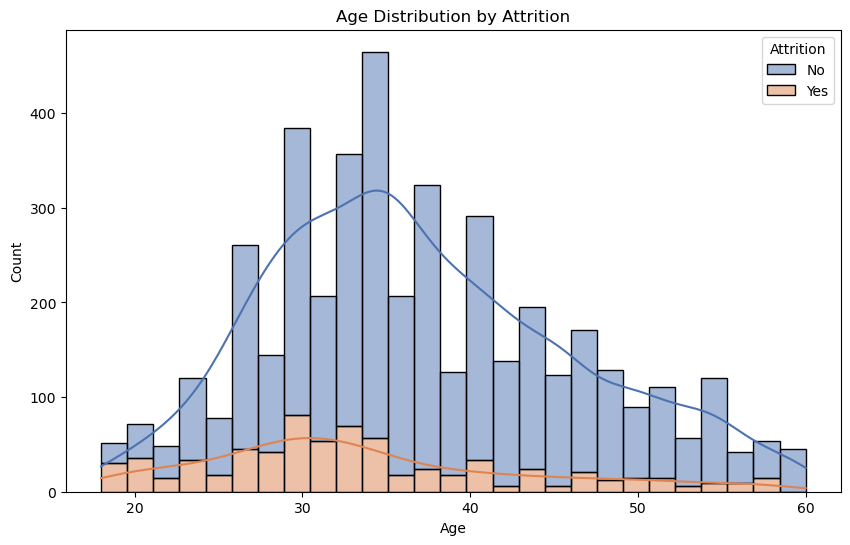

In [79]:
# Plotting the Distribution of Attrition by Age

plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Attrition', multiple='stack', kde=True, palette='deep')
plt.title('Age Distribution by Attrition')
plt.show()

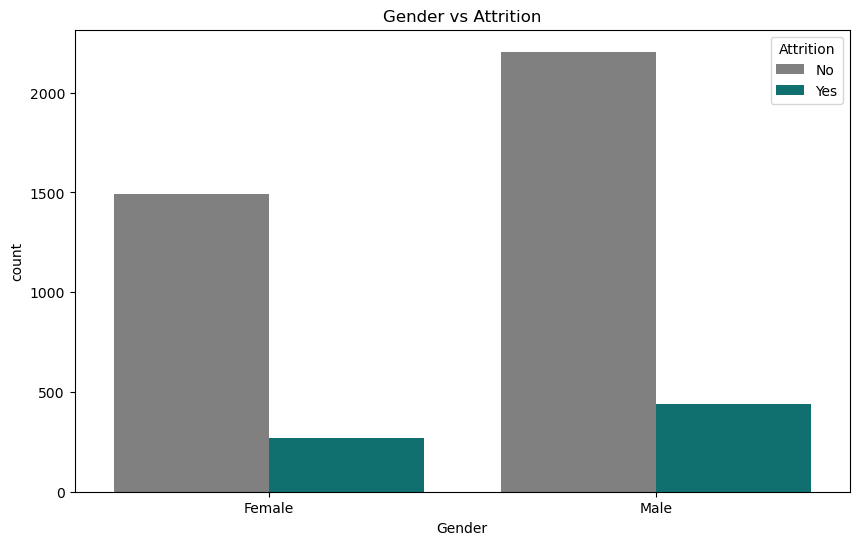

In [80]:
# Plotting the Distribution of Attrition by Gender

custom_palette = {'Yes': 'teal', 'No': 'grey'}
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df,palette=custom_palette)
plt.title('Gender vs Attrition')
plt.show()

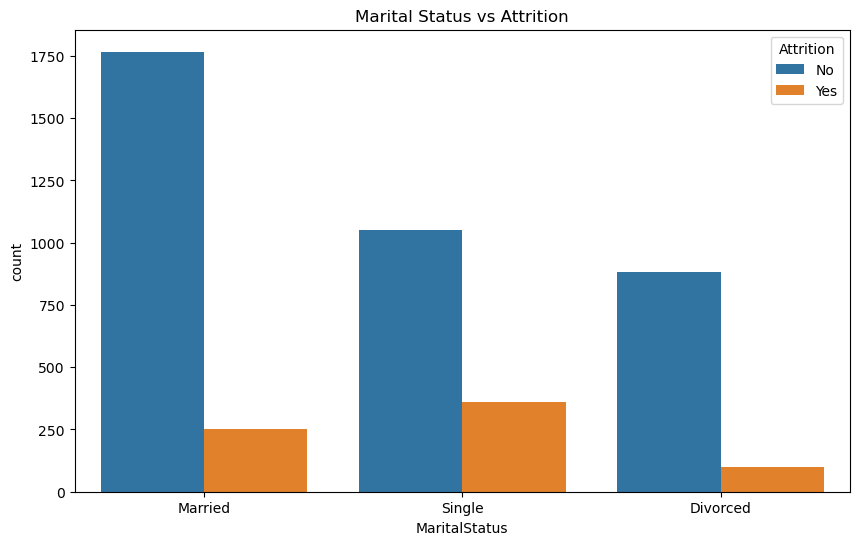

In [81]:
# Plotting the Distribution of Attrition by Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Marital Status vs Attrition')
plt.show()

<span style="font-size:24px;">Salary and Financial Incentives</span>

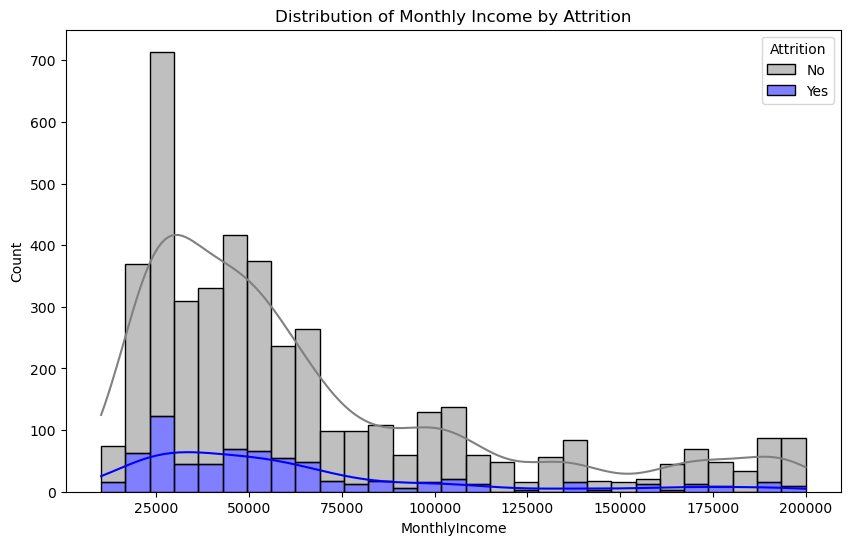

NameError: name 'ow' is not defined

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette
palette = {'Yes': 'blue', 'No': 'grey'}

plt.figure(figsize=(10, 6))
sns.histplot(df, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=True, palette=palette)
plt.title('Distribution of Monthly Income by Attrition')
plt.show()ow()

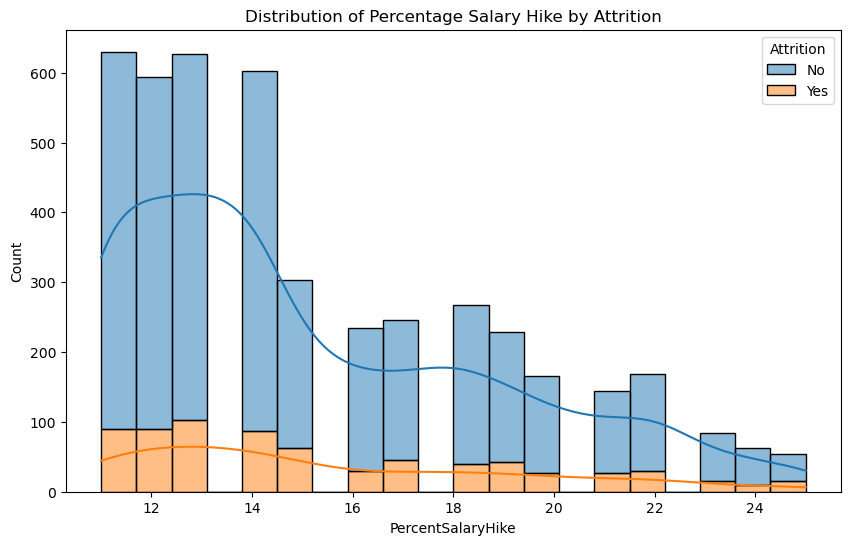

In [87]:
 # Plotting the Distribution of Percentage Salary Hike by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(df, x='PercentSalaryHike', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Percentage Salary Hike by Attrition')
plt.show()

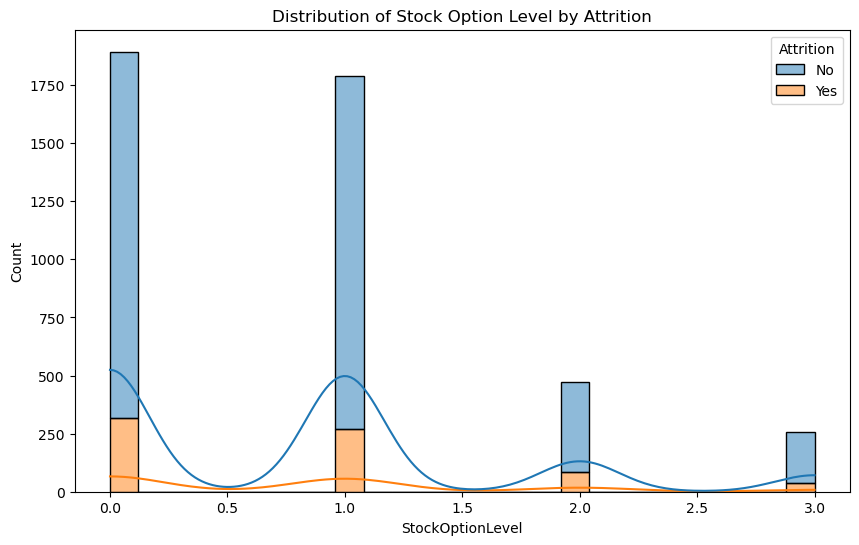

In [88]:
 # Plotting the Distribution of Stock Option Level by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(df, x='StockOptionLevel', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Stock Option Level by Attrition')
plt.show()

<span style="font-size:24px;">Job Related Factors</span>

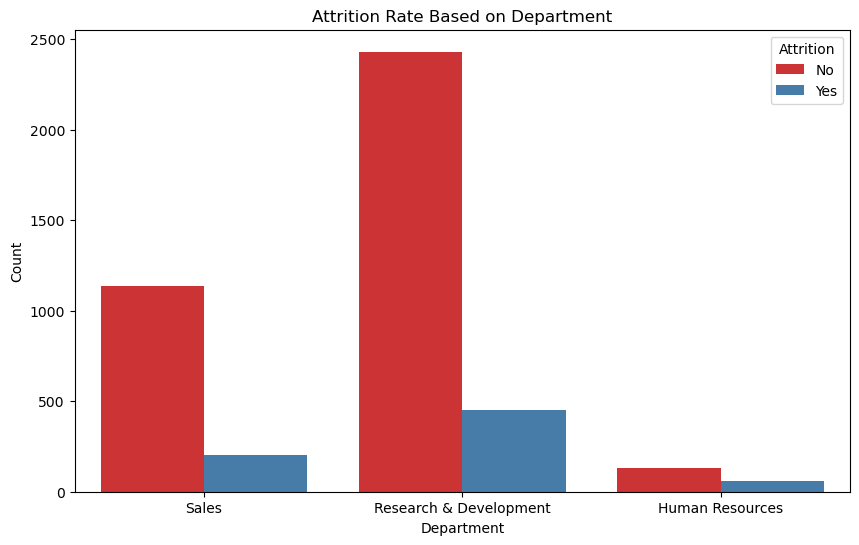

In [91]:
# Plotting the Distribution of Department by Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Department')
plt.ylabel('Count')
plt.show()

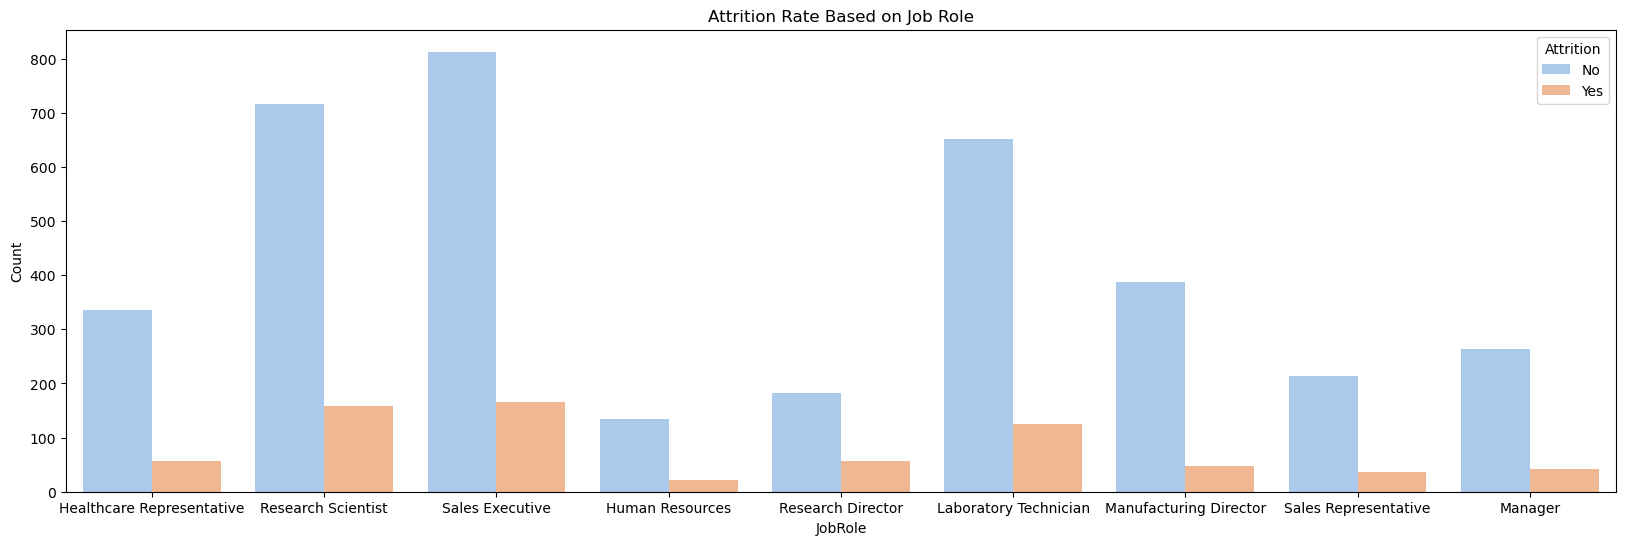

In [93]:
# Plotting the Distribution of Job role by Attrition
plt.figure(figsize=(20, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df,palette='pastel')
plt.title('Attrition Rate Based on Job Role')
plt.ylabel('Count')
plt.show()

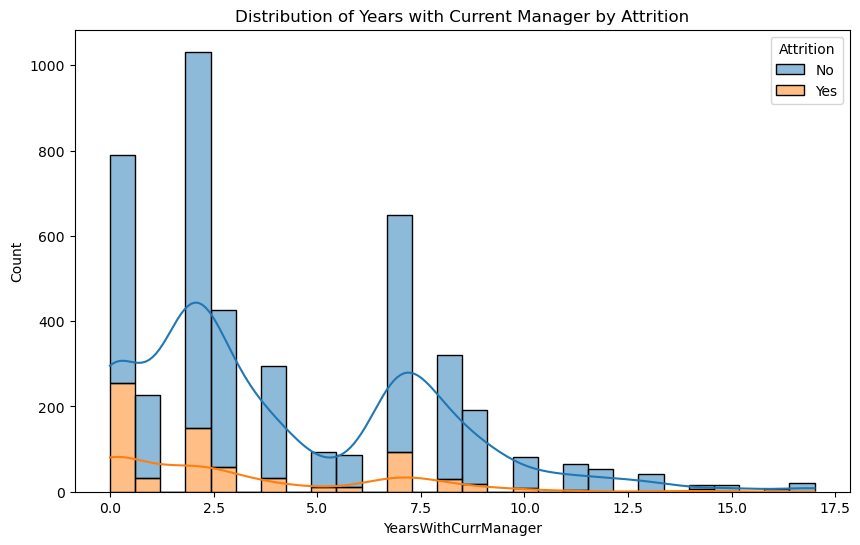

In [94]:
# Plotting the Distribution of Years with Current Manager by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(df, x='YearsWithCurrManager', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Years with Current Manager by Attrition')
plt.show()

<span style="font-size:24px;">Work Environment and Job Satisfaction</span>

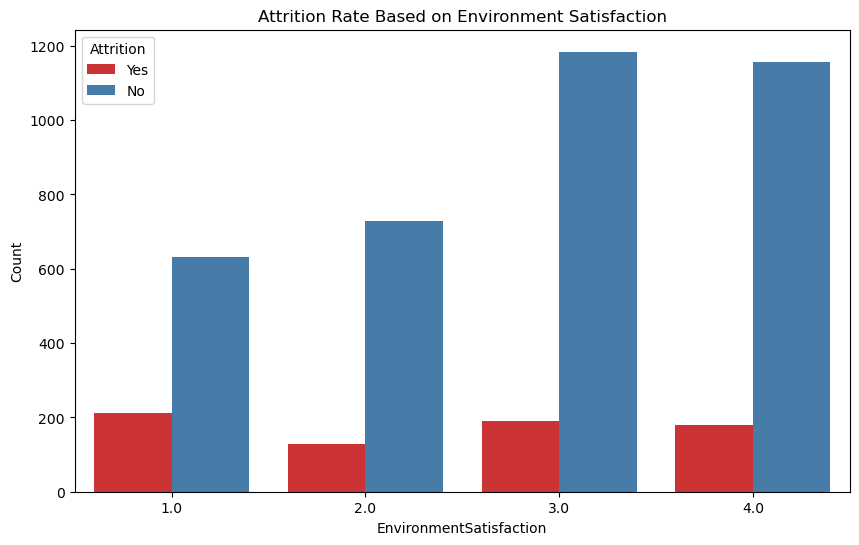

In [98]:
#Plotting the Distribution of Environment Satisfaction by Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Environment Satisfaction')
plt.ylabel('Count')
plt.show()

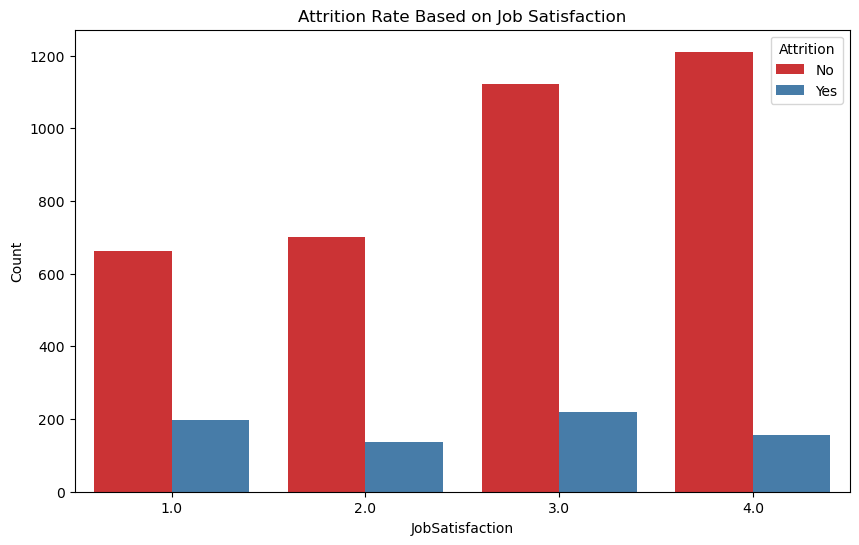

In [99]:
#Plotting the Distribution of Job Satisfaction by Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Job Satisfaction')
plt.ylabel('Count')
plt.show()

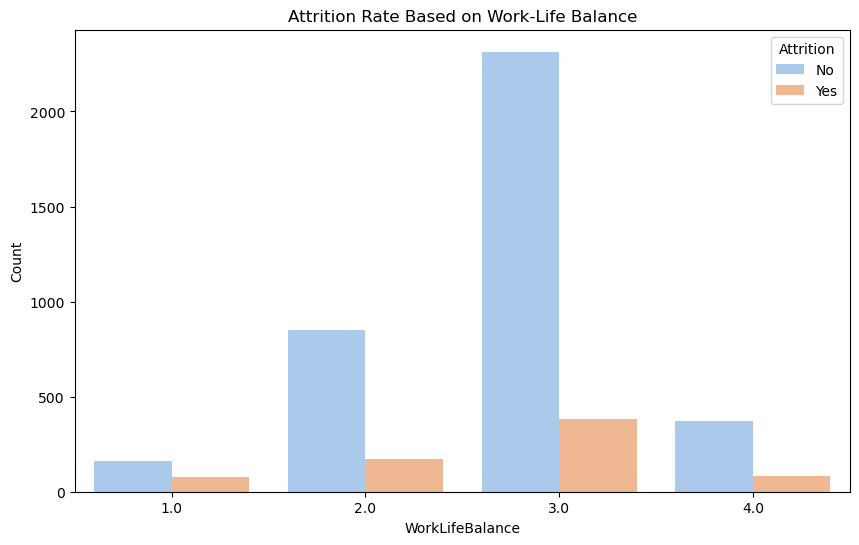

In [101]:
#Plotting the Distribution of Work-Life Balance by Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='pastel')
plt.title('Attrition Rate Based on Work-Life Balance')
plt.ylabel('Count')
plt.show()

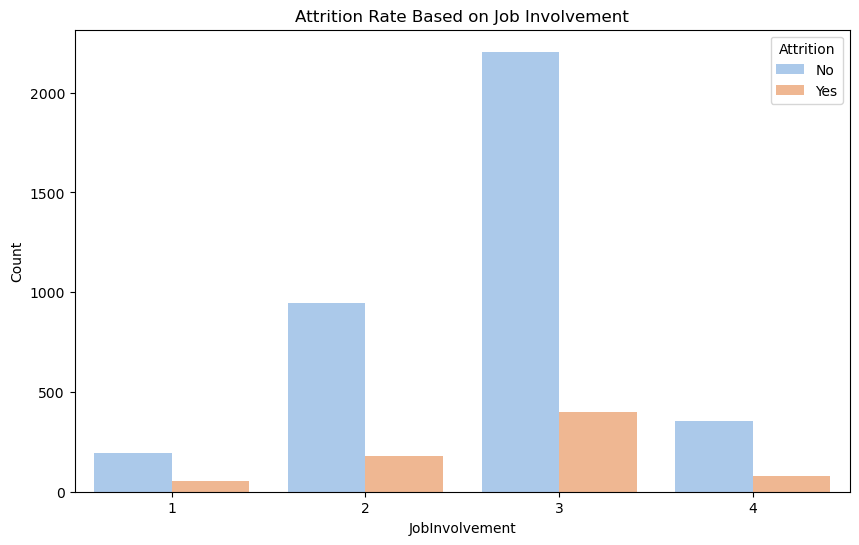

In [102]:
#Plotting the Distribution of Job Involvement by Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='JobInvolvement', hue='Attrition', data=df,palette='pastel')
plt.title('Attrition Rate Based on Job Involvement')
plt.ylabel('Count')
plt.show()

<span style="font-size:24px;">Career Progression</span>

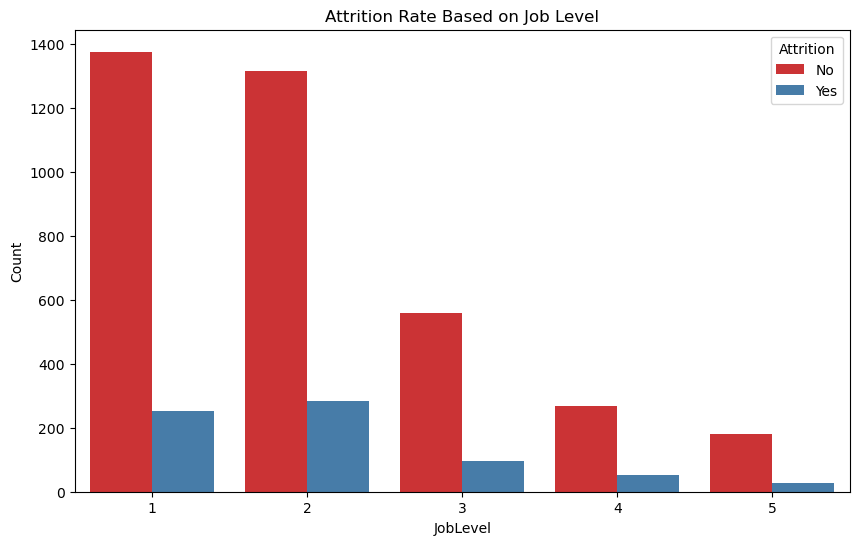

In [105]:
#Plotting the Distribution of Job level by Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Job Level')
plt.ylabel('Count')
plt.show()

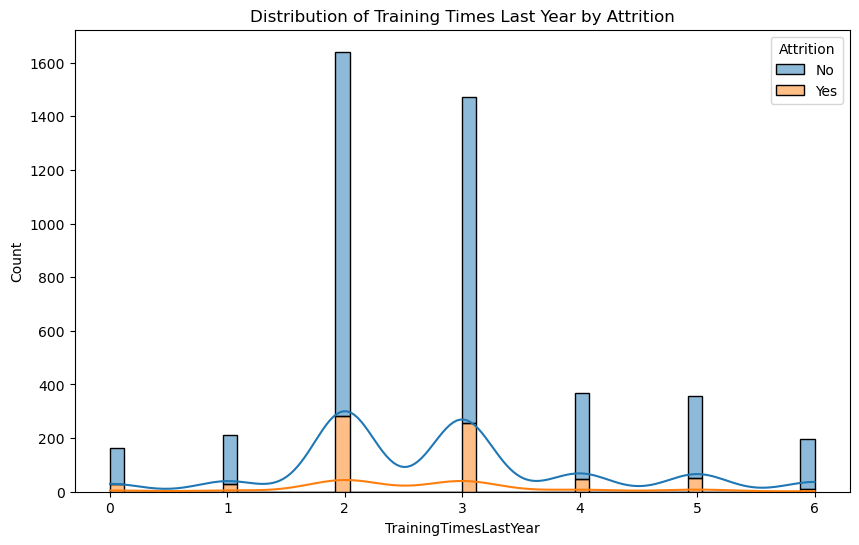

In [107]:
#Plotting the Distribution of Training Times Last Year by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(df, x='TrainingTimesLastYear', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Training Times Last Year by Attrition')
plt.show()

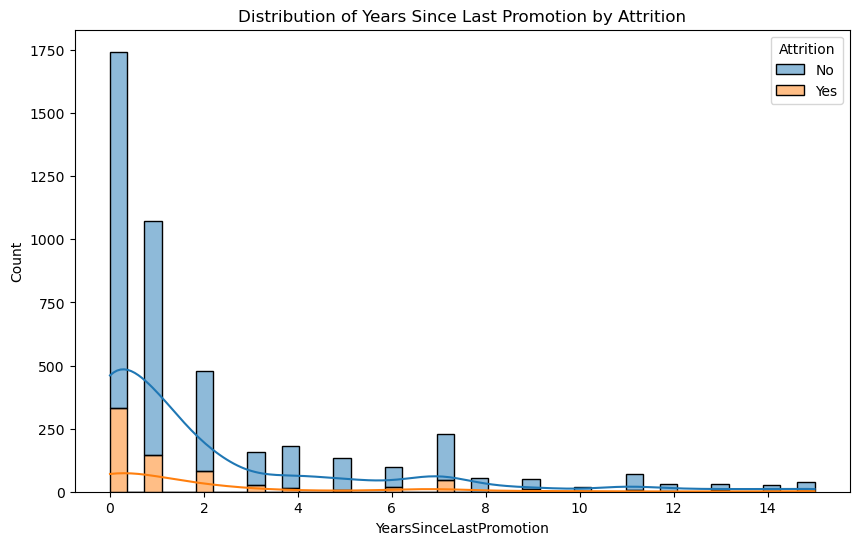

In [109]:
#Plotting the Distribution of Years Since Last Promotion by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(df, x='YearsSinceLastPromotion', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Years Since Last Promotion by Attrition')
plt.show()

<span style="font-size:24px;">Commute and Travelling</span>

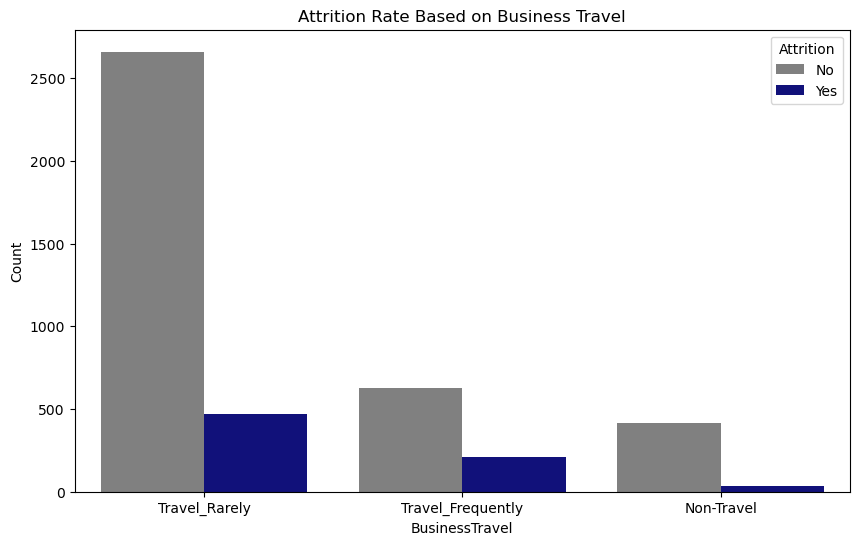

In [113]:
#Plotting the Distribution of Business Travel by Attrition
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette={'Yes': 'darkblue', 'No': 'gray'})
plt.title('Attrition Rate Based on Business Travel')
plt.ylabel('Count')
plt.show()

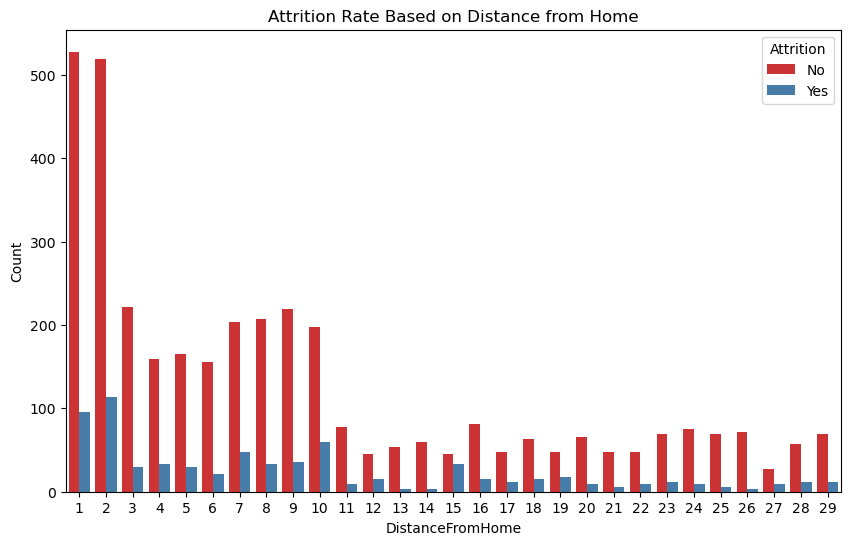

In [114]:
#Plotting the Distribution of Distance from Home to Work by Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Distance from Home')
plt.ylabel('Count')
plt.show()

<span style="font-size:24px;">Employee Performance and History</span>

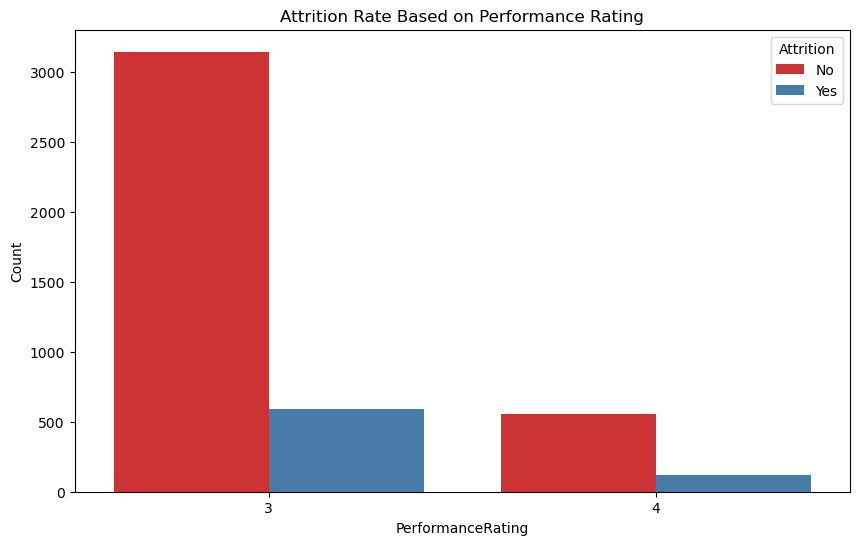

In [117]:
#Plotting the Distribution of Distance from Performance Rating by Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Performance Rating')
plt.ylabel('Count')
plt.show()

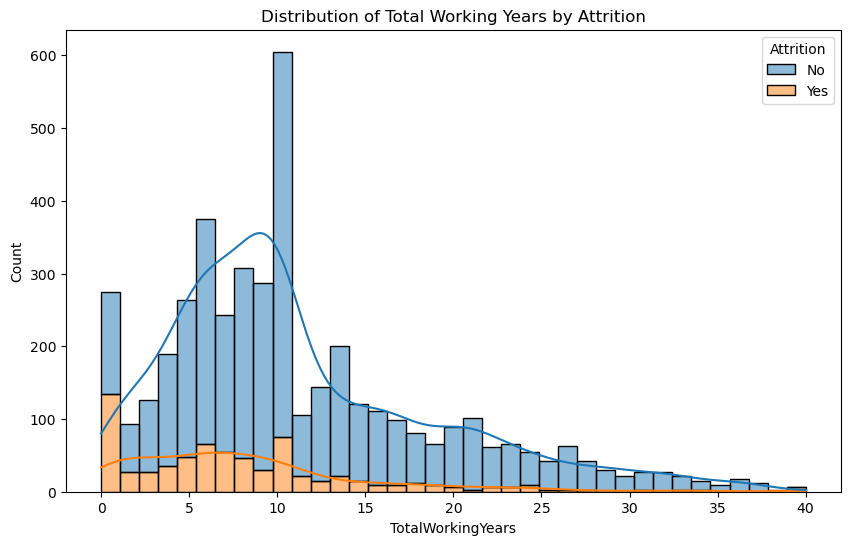

In [118]:
#Plotting the Distribution of Total Working Year by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(df, x='TotalWorkingYears', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Total Working Years by Attrition')
plt.show()

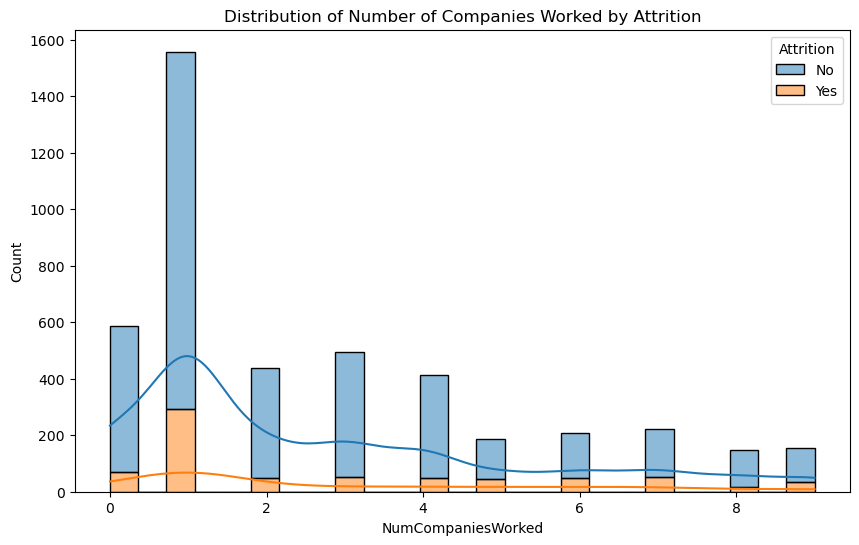

In [120]:
#Plotting the Distribution of Number of Companies Worked by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(df, x='NumCompaniesWorked', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Number of Companies Worked by Attrition')
plt.show()

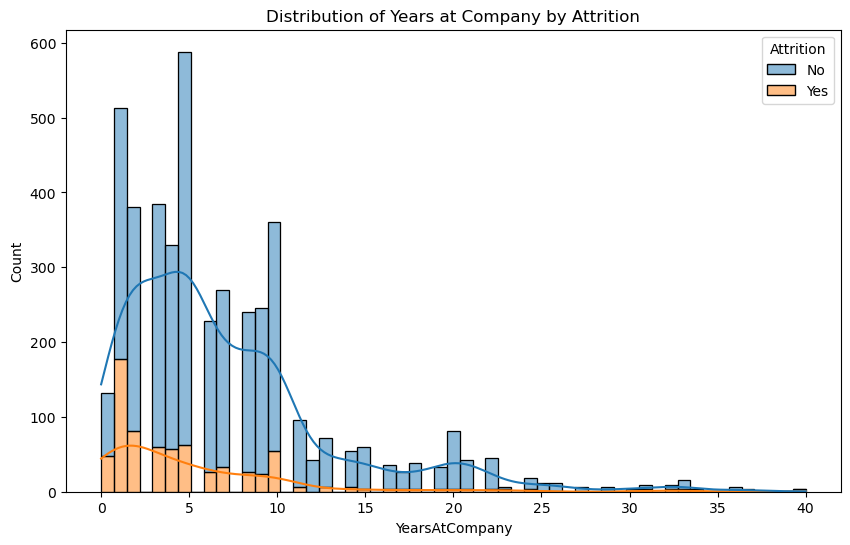

In [121]:
#Plotting the Distribution of Number of Years at Company of Attrition
plt.figure(figsize=(10, 6))
sns.histplot(df, x='YearsAtCompany', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Years at Company by Attrition')
plt.show()

**<span style="font-size:24px;">Correlation Analysis</span>**

The correlation matrix heatmap visually represents the Pearson correlation coefficients between pairs of features in the dataset. Each cell in the matrix shows the correlation between the variables on the respective x and y axes. The color intensity indicates the strength of the correlation, with dark red representing strong positive correlations, dark blue representing strong negative correlations, and lighter shades indicating weaker correlations.

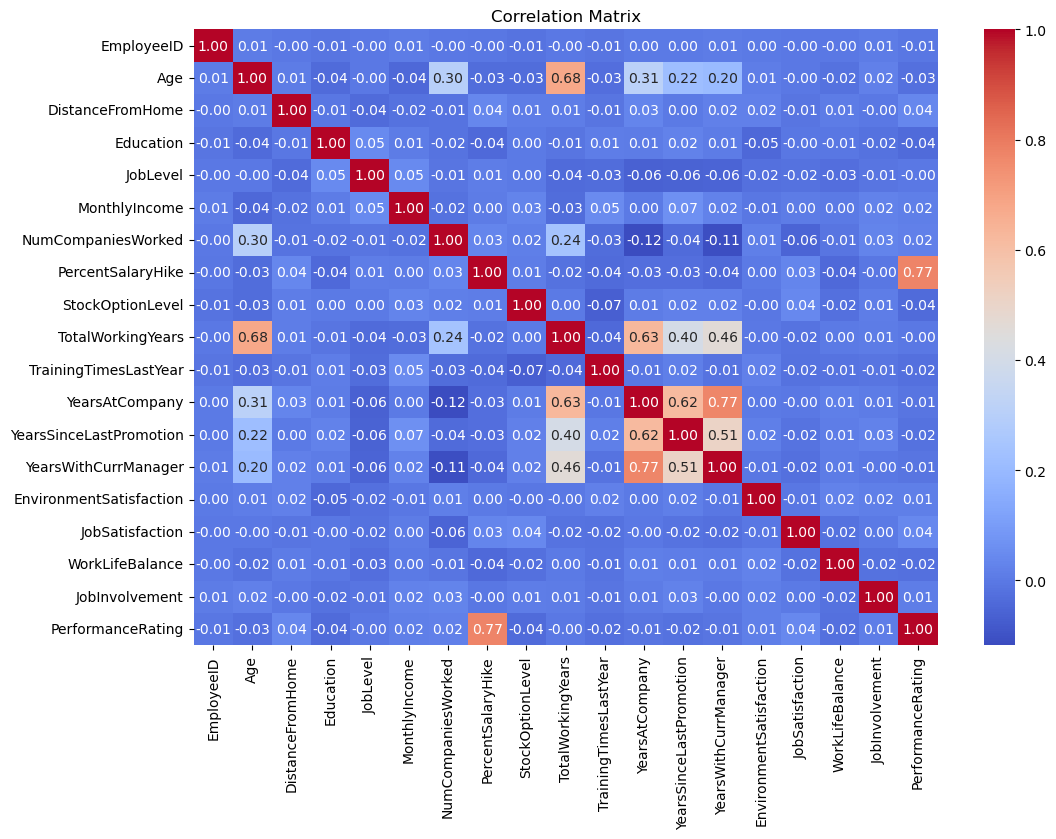

In [129]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Observations:

**Strong Correlations:**

Total Working Years and Age (0.68): A strong positive correlation indicates that as employees age, their total working years increase.

Job Level and Monthly Income (0.05): A significant positive correlation shows that higher job levels are associated with higher monthly incomes.

Percent Salary Hike and Stock Option Level (0.77): A high correlation suggests that higher salary hikes are strongly related to higher stock option levels.

**Moderate Correlations:**

Years At Company and Years With Current Manager (0.77): A moderate positive correlation indicates that employees who stay longer at the company tend to have spent more years with their current manager.

Total Working Years and Years Since Last Promotion (0.40): A moderate positive correlation suggests that employees with more total working years tend to have had more time since their last promotion.

Environment Satisfaction and Job Satisfaction (0.02): A moderate correlation indicates that employees satisfied with their work environment are likely to also be satisfied with their jobs.

**Weak Correlations:**

Distance From Home and Monthly Income (0.01): Shows a minimal effect on financial metrics, indicating that distance from home has a negligible impact on income.

Units Sold and Unit Price (-0.20): A slight negative correlation suggests that higher sales volumes might slightly reduce unit prices.
Interpretation:

This correlation matrix helps in understanding the relationships between different features, which is crucial for feature selection and building effective predictive models for employee attrition.